<a href="https://colab.research.google.com/github/alexisbianco0919/compsci216-project/blob/main/affects_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# import needed libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
from scipy import stats

In [4]:
# download data from merged_data.csv
cd = pd.read_csv('https://raw.githubusercontent.com/alexisbianco0919/compsci216-project/main/clean_data_4.csv')

# visualize data
cd

,self_employeed,company_size,tech_company,tech_prole,mh_benefits,anonymity,leaving_difficulty,disc_mh_coworker,disc_mh_supervisor,reveal_mh_business,reveal_mh_coworkers,affects_productivity,productivity_percent,mention_ph_interview,mention_mh_interview,share_mh_ff,exp_unsupport,reveal_less,family_history,mh_in_past,mh_currently,mh_diagnosed,sought_treatment,age,gender,country_live,state_live,country_work,state_work,year,gender_cleaned
0,False,26-100,True,NaN,Not eligible for coverage / NA,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,No,Yes,No,NaN,NaN,39.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
1,False,6-25,True,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,Yes,Yes,Yes,NaN,NaN,29.0,male,United States of America,Illinois,United States of America,Illinois,2016,male
2,False,6-25,True,NaN,No,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Somewhat open,Maybe/Not sure,NaN,No,Maybe,No,NaN,NaN,38.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, if it comes up","Sometimes, if it comes up",Yes,1-25%,Yes,NaN,Neutral,No,NaN,No,Yes,Yes,NaN,NaN,43.0,male,United Kingdom,NaN,United Kingdom,NaN,2016,male
4,False,6-25,False,True,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,"Yes, I experienced",NaN,Yes,Yes,Yes,NaN,NaN,43.0,Female,United States of America,Illinois,United States of America,Illinois,2016,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,False,More than 1000,False,True,I don't know,I don't know,Somewhat difficult,No,No,NaN,NaN,NaN,NaN,Maybe,No,Very open,"Yes, I observed",Maybe,No,No,Maybe,NaN,False,27.0,male,India,NaN,India,NaN,2019,male
2954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Yes,26-50%,Maybe,Maybe,Somewhat not open,"Yes, I observed",NaN,No,No,No,NaN,False,48.0,m,United States of America,Louisiana,United States of America,Louisiana,2019,male
2955,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Unsure,NaN,Yes,No,Very open,I've always been self-employed,NaN,No,No,No,NaN,False,50.0,M,India,NaN,India,NaN,2019,male
2956,False,More than 1000,True,True,No,Yes,Difficult,Maybe,No,NaN,NaN,NaN,NaN,No,No,Somewhat not open,Maybe/Not sure,Yes,No,No,Maybe,NaN,False,30.0,female,India,NaN,India,NaN,2019,female


In [ ]:
cd['affects_productivity'].value_counts(dropna=False)

In [ ]:
n = len(cd)
#cd['affects_productivity'] = cd['affects_productivity'].replace(np.nan, 'Not applicable to me')
#ap_counts = cd.groupby('year')['affects_productivity'].value_counts(dropna = False).unstack()#/n
#ap_counts

In [ ]:
sns.countplot(data=cd, x='affects_productivity')

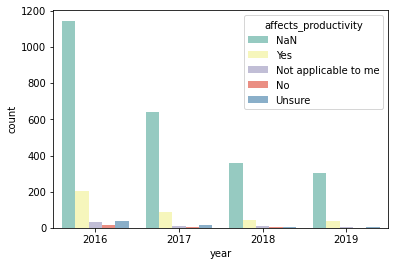

In [ ]:
#cd_edit = cd.copy
cd['affects_productivity'] = cd['affects_productivity'].fillna('NaN')
#cd_edit['self_employeed'] = cd_edit['self_employeed'].replace(np.nan, 'NaN')
sns.countplot(data=cd, x='year', hue='affects_productivity', palette = "Set3")

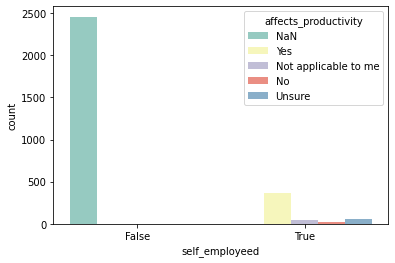

In [ ]:
sns.countplot(data=cd, x='self_employeed', hue='affects_productivity', palette = "Set3")

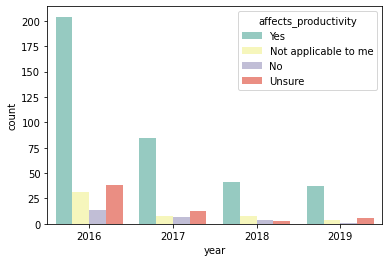

In [ ]:
sns.countplot(data=cd[cd['affects_productivity'] != 'NaN'], x='year', hue='affects_productivity', palette = "Set3")

In [ ]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs)

grid = sns.FacetGrid(data=cd,col='year',size=4,aspect=1)
fig = grid.map(countplot,'affects_productivity','gender_cleaned')#,palette='Set1',order=df.Marker1.unique())
fig.add_legend()

In [ ]:
#sns.relplot(data=cd, x='age', hue='affects_productivity')
def histplot(x, **kwargs):
    sns.histplot(x=x, **kwargs)

grid = sns.FacetGrid(data=cd,col='affects_productivity',size=4,aspect=1)
fig = grid.map(histplot,'age')#,palette='Set1',order=df.Marker1.unique())
fig.add_legend()
#sns.histplot(data=cd, x='age')

In [6]:
filt_se = cd[cd['self_employeed'] == True]
filt_se.head()

,self_employeed,company_size,tech_company,tech_prole,mh_benefits,anonymity,leaving_difficulty,disc_mh_coworker,disc_mh_supervisor,reveal_mh_business,reveal_mh_coworkers,affects_productivity,productivity_percent,mention_ph_interview,mention_mh_interview,share_mh_ff,exp_unsupport,reveal_less,family_history,mh_in_past,mh_currently,mh_diagnosed,sought_treatment,age,gender,country_live,state_live,country_work,state_work,year,gender_cleaned
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, if it comes up","Sometimes, if it comes up",Yes,1-25%,Yes,NaN,Neutral,No,NaN,No,Yes,Yes,NaN,NaN,43.0,male,United Kingdom,NaN,United Kingdom,NaN,2016,male
9,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, because it doesn't matter","Sometimes, if it comes up",Yes,1-25%,Yes,NaN,Very open,No,NaN,Yes,Yes,Yes,NaN,NaN,30.0,Male,United States of America,Kentucky,United States of America,Kentucky,2016,male
18,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, because it would impact me negatively","No, because it would impact me negatively",Yes,76-100%,No,NaN,Somewhat not open,"Yes, I observed",NaN,I don't know,Yes,Yes,NaN,NaN,25.0,female,United States of America,Washington,United States of America,Washington,2016,female
24,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Not applicable to me,NaN,Maybe,NaN,Not applicable to me (I do not have a mental i...,NaN,NaN,No,No,No,NaN,NaN,38.0,Male,United States of America,New York,United States of America,New York,2016,male
33,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, because it doesn't matter","Sometimes, if it comes up",Yes,1-25%,No,NaN,Somewhat open,No,NaN,No,No,No,NaN,NaN,37.0,Male,Czech Republic,NaN,Czech Republic,NaN,2016,male


In [16]:
#hypothesis test if self-employed people were more likely to say their mental
#health affected productivity
n_2016 = len(filt_se[filt_se['year'] == 2016])
n_2017 = len(filt_se[filt_se['year'] == 2017])
n_2018 = len(filt_se[filt_se['year'] == 2018])
n_2019 = len(filt_se[filt_se['year'] == 2019])

mu_2016 = len(filt_se[(filt_se['year'] == 2016) & (filt_se['affects_productivity'] == 'Yes')])/n_2016
mu_2017 = len(filt_se[(filt_se['year'] == 2017) & (filt_se['affects_productivity'] == 'Yes')])/n_2017
mu_2018 = len(filt_se[(filt_se['year'] == 2018) & (filt_se['affects_productivity'] == 'Yes')])/n_2018
mu_2019 = len(filt_se[(filt_se['year'] == 2019) & (filt_se['affects_productivity'] == 'Yes')])/n_2019

sigma_2016 = np.sqrt(mu_2016*(1-mu_2016))
sigma_2017 = np.sqrt(mu_2017*(1-mu_2017))
sigma_2018 = np.sqrt(mu_2018*(1-mu_2018))
sigma_2019 = np.sqrt(mu_2019*(1-mu_2019))
#also test if percentage changed year over year

p_1 = stats.ttest_ind_from_stats(mean1 = mu_2016, std1 = sigma_2016, nobs1 = n_2016,
                                  mean2 = mu_2017, std2 = sigma_2017, nobs2 = n_2017)[1]

p_2 = stats.ttest_ind_from_stats(mean1 = mu_2016, std1 = sigma_2016, nobs1 = n_2016,
                                  mean2 = mu_2018, std2 = sigma_2018, nobs2 = n_2018)[1]

p_3 = stats.ttest_ind_from_stats(mean1 = mu_2016, std1 = sigma_2016, nobs1 = n_2016,
                                  mean2 = mu_2019, std2 = sigma_2019, nobs2 = n_2019)[1]

p_4 = stats.ttest_ind_from_stats(mean1 = mu_2017, std1 = sigma_2017, nobs1 = n_2017,
                                  mean2 = mu_2018, std2 = sigma_2018, nobs2 = n_2018)[1]

p_5 = stats.ttest_ind_from_stats(mean1 = mu_2017, std1 = sigma_2017, nobs1 = n_2017,
                                  mean2 = mu_2019, std2 = sigma_2019, nobs2 = n_2019)[1]

p_6 = stats.ttest_ind_from_stats(mean1 = mu_2018, std1 = sigma_2018, nobs1 = n_2018,
                                  mean2 = mu_2019, std2 = sigma_2019, nobs2 = n_2019)[1]

0.6502983154854325

In [ ]:
#hypothesis test if, of those who said mh affected productivity, was there a
#difference in % who said they would mention a physical ailment vs who said
#they would mention a mental ailment
#also test year over year but drop 2016

In [ ]:
#hypothesis test whether there was a significant difference in %
#reporting mh affects productivity having open families compared to other groupings

In [ ]:
#hypothesis test whether there was a significant difference in %
#reporting mh affects productivity having family history compared to other groupings

In [ ]:
#hypothesis test whether there was a significant difference in %
#reporting mh affects productivity having past mh compared to other groupings

In [ ]:
#hypothesis test whether there was a significant difference in %
#reporting mh affects productivity having current mh compared to other groupings